# **Data Preprocessing**

We have a dataset with 14 puppet classes. Each class has approximately 100 images collected from google images. In this Data Preparation, we want to divide the data into data for training and data for testing.

The data before preprocessing will look as follows:

-WAYANG
*   Kresna
*   Petruk
*   Bima
*   etc





The data after preprocessing will look like the following:
 
*   DATASET
  *   TRAIN
      *   Kresna
      *   Petruk
      *   Bima
      *   etc

  *   TEST
      *   Kresna
      *   Petruk
      *   Bima
      *   etc




# **Import All Denpendencies**

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab import drive


# **Validate the Data**



In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


Unzip the data

In [ ]:
!unzip "/content/drive/MyDrive/Lakon/Dataset/Wayang.zip" -d "/content/drive/MyDrive/Lakon/Dataset"

In [5]:
wayang_types = os.listdir("/content/drive/MyDrive/Lakon/Dataset/Dataset")
print (wayang_types)

['Petruk', 'Semar', 'Yudhistira', 'Nakula', 'Kresna', 'Gatot Kaca', 'Antasena', 'Hanoman', 'Bima', 'Bagong', 'Abimanyu', 'Arjuna', 'Gareng', 'Cepot']


# **Create Destination Directory Structure**

In [6]:
%cd /content/drive/MyDrive/Lakon/
cwd = os.getcwd()
print (cwd)

/content/drive/MyDrive/Lakon
/content/drive/MyDrive/Lakon


In [7]:
cwd = os.getcwd()
print (cwd)

if os.path.exists("DATASET"):
    print("Directory is already created!")
else:
    print("Creating DATASET directory ...")
    for types in wayang_types:
        os.makedirs(os.path.join(cwd,"DATASET","TRAIN",types))
        os.makedirs(os.path.join(cwd,"DATASET","TEST",types))
    print("DATASET directory is created!")

/content/drive/MyDrive/Lakon
Directory is already created!


# **Plot the Dataset distribution**

Petruk --> 115
Semar --> 110
Yudhistira --> 105
Nakula --> 101
Kresna --> 100
Gatot Kaca --> 100
Antasena --> 100
Hanoman --> 116
Bima --> 120
Bagong --> 126
Abimanyu --> 100
Arjuna --> 103
Gareng --> 100
Cepot --> 100


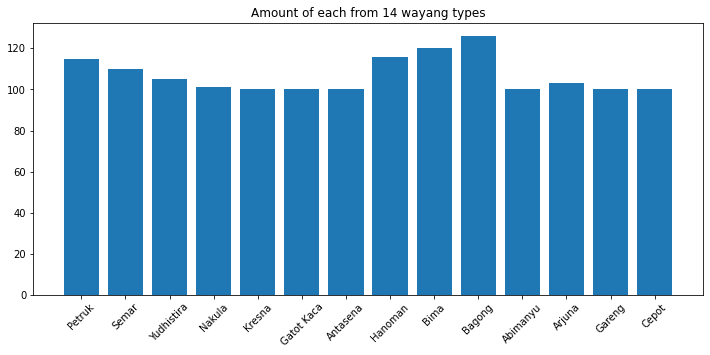

In [8]:
data_count = []
loc = '/content/drive/MyDrive/Lakon/Dataset/Dataset'
for types in wayang_types:
    count = len(os.listdir(os.path.join(cwd, loc, types)))
    print(f'{types} --> {count}')
    data_count.append(count)

plt.figure(figsize=(12,5))
plt.title(f"Amount of each from {len(wayang_types)} wayang types")
plt.bar(wayang_types, data_count)
plt.xticks(rotation=45)
plt.show()

# **Split the data**

In [ ]:
dataset_size = 100
train_size = 80
Wayang = '/content/drive/MyDrive/Lakon/Dataset/Dataset'
for types in wayang_types:
    print(types)
    filenames = os.listdir(os.path.join(Wayang,types))
    filenames = random.sample(filenames, dataset_size)
    for idx, name in enumerate(filenames):
        image = cv2.imread(os.path.join(cwd,Wayang,types,name))
        image = cv2.resize(image,(224,224),interpolation = cv2.INTER_AREA)
        if idx < train_size:
            cv2.imwrite(os.path.join(cwd,"DATASET","TRAIN", types, str(idx)+".jpg"),image)
        else:
            cv2.imwrite(os.path.join(cwd,"DATASET","TEST", types, str(idx)+".jpg"),image)

Petruk
Semar
Arjuna
Yudhistira
Nakula
Kresna
Cepot
Gatot Kaca
Antasena
Gareng
Hanoman
Bima
Bagong
Abimanyu


Finally, the preprocessed dataset will be uploaded to Kaggle for later use in making Machine Learning models.